# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [41]:
import pandas as pd
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from code.bootstrap_routines import *
import pylab 

%matplotlib inline



df = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Mini_Projects/EDA_human_temperature/data/human_body_temperature.csv')



In [42]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


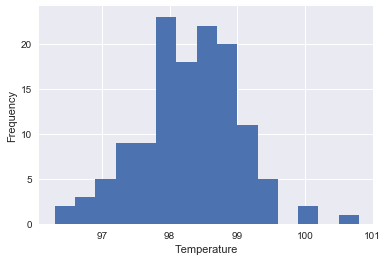

In [5]:
ax = df['temperature'].plot(kind='hist', bins=15)
ax.set_xlabel("Temperature")


In [92]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1. Is the distribution of body temperatures normal?

##### Graphical EDA

- As shown above in the Histogram we can see that the temperature data follows a normal distribution.
- We can also see from the "describe" method above that the Mean of Temperature(98.24) is very close to the Median of Temperature (98.30) which is indicative of a Normal Distribution since Mean=Median if the data is normally distributed.


##### Normality test

- In order for us to determine if the body temperature in the given sample follows the Normal distribution we can apply the Hypothesis test with 

    - H0 : The Data is normally distributed.
    - Ha : The Data is not normally distributed.


In [6]:
x = df['temperature']

shapiro_results = scipy.stats.shapiro(x)

print('Shapiro Results'+' P-Value = ' + str(shapiro_results[1]) + '  Test-Statistic  =' + str(shapiro_results[0]))

z,pval = stats.normaltest(x)

print('Normal test Results'+' P-Value = ' + str(pval) + '  z  =' + str(z))




Shapiro Results P-Value = 0.233174666762352  Test-Statistic  =0.9865770936012268
Normal test Results P-Value = 0.258747986349  z  =2.70380143332


- P-Value = 0.23 > 0.05  

    - We are failing to reject the null hypothesis and so we can say that the null hypothesis is valid; which means the data is following the normal distribution.

    - (Note that P-Value and Test-Statistic are the same , P value is % where as T-statistic is "Z" which is how many std.deviaton away from Mean)



### 2. Is the sample size large? Are the observations independent?

- Each observation is independent since each row of data is its own observation.
- There are 130 rows so the sample size is large enough. 

### 3. Is the true population mean really 98.6 degrees F?

##### Trying Bootstrap Hypothesis test

- Step 1: State null and alternative hypotheses: 
    - H0: population mean body Temp  = 98.6
    - Ha: population mean body Temp <> 98.6

- Step 2: Set the significance level . We’ll choose 5%.

- Step 3: Choose a test statistic. We wish to estimate the mean temp, and therefore we’ll use the sample average.

- Step 4: Find the observed value of the test statistic using the sample (sample mean)

In [30]:
x.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

Step 6: Generate the boostrap replicates 

- We calculate the 95% confidence interval of the mean as shown below


In [8]:
ci_lower,ci_upper = bootci(x)

print('Lower',ci_lower)
print('Upper',ci_upper)

Lower 98.1230769231
Upper 98.3746153846


- Note that the Sample mean body Temp = 98.24 and Since the 95% confidence interval of the mean is (98.123,98.374) and the 98.6 temp falls out of the 95% confidence interval we can say that population mean body Temp <> 98.6  

In [ ]:
'''
def bootstrap_replicate_1d(data,func):

    return func(np.random.choice(data,size=len(data)))



def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

       
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
       
    return bs_replicates


#bs_replicates = draw_bs_reps(shifted_temp_data,diff_from_testtemp,10000)
bs_replicates = draw_bs_reps(x,np.mean,10000)



plt.hist(bs_replicates, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

p_value = np.sum(bs_replicates <= np.mean(x)) / 10000

print('p = ', p_value)


CI_twentyfive = np.percentile(bs_replicates, [0.025])

CI_nineseven = np.percentile(bs_replicates, [0.975])

print('Twenty Five Percentile = ', CI_twentyfive)
print('Ninety Seven Percentile = ', CI_nineseven)

'''


##### Trying Frequentist test

##### Z-Test

   - Since the Sample size (130) is greater then 30; we will use the Z-Test.
   - One Sample Z-test

       - Since we want to check if our Sample mean is statistically different or not then our Population mean; we use one sample Z-Test. 

- H0: population mean body Temp  = 98.6
- Ha: population mean body Temp <> 98.6



- Calculating the Z-Score

In [111]:
population_mean = 98.6

znum = x.mean() - population_mean

zdenom = x.std() / math.sqrt(len(x))

z = znum/zdenom

print(z)


-5.454823292364079


-This calculated z-value of -5.45 mean that the sample mean of 98.25 is "5.45" standard error units below the population mean of 98.6.

-P value which is probability of getting population mean within 5.45 standard error units from sample mean of 98.25.

-The p_value is calculated using Z-score using 2 tails using the following formula


In [114]:
Pvalue = stats.norm.cdf(z) * 2

print(Pvalue)



4.90215701411e-08


P-Value = 4.90215701411e-08 (which is around 0.000000004)

P-Value < 0.05

so we reject the null hypothesis and we can say that the alternate Hypothesis is correct and the population mean body Temp <> 98.6

#### 3.4 Now try using the other test. 

- We will use the T-Test

- Note that we could use the T-Score formulae which is = 
(Sample Mean - Population Mean)/ ((Sample Std Deviation)/sqrt(Sample Size)) but instead we use a built-in SciPy function 
stats.ttest_1samp


- H0: population mean body Temp = 98.6
- Ha: population mean body Temp <> 98.6



In [120]:


t_statistic, p_value = stats.ttest_1samp(x, population_mean)

In [124]:
print('t_statistic = ',t_statistic)
print('p_value = ',p_value)

t_statistic =  -5.45482329236
p_value =  2.41063204156e-07


P-Value = 2.41063204156e-07 (which is around 0.00000002)

P-Value < 0.05

so we reject the null hypothesis and we can say that the alternate Hypothesis is correct and
the population mean body Temp <> 98.6



##### How is the result be different? Why?
- Lets check the 95% confidence interval we get from T-Test and Z-Test to answer this question

#### Calculating 95% Confidence Interval For T-Statistic

##### The Formulae for calculating 95% confidence interval for T-Statistic is =  Sample Mean +- (Critical_t-value * sample.std.deviation/sqrt(n))  

In [34]:
Sample_mean = 98.24

Sample_Std_Deviation = 0.73

n = 130

confidence_interval_val = 95/100

#To find the T-Value first we have to find the DF or Degree of Freedom

DF = n-1

#Next we need to find the alpha level 

Alpha = (1 - confidence_interval_val)/2

print('DF = ',DF)
print('Alpha = ',Alpha)




DF =  129
Alpha =  0.025000000000000022


In [21]:
#For DF=129 and Alpha=0.0250 the One-Tailed Critical T-Value=1.98

Critical_t_val = 1.98

margin_of_error = Critical_t_val * (Sample_Std_Deviation/np.sqrt(n))

print('Margin of Error = ',margin_of_error)

Margin of Error =  0.126769966111


In [22]:
lower_bound = Sample_mean - margin_of_error
upper_bound = Sample_mean + margin_of_error

print('95% Confidence Interval = ',lower_bound,upper_bound)

95% Confidence Interval =  98.1132300339 98.3667699661


#### Calculating 95% Confidence Interval For Z-Statistic

##### The Formulae for calculating 95% confidence interval for Z-Statistic is =  Sample Mean +- (Critical_Z-value * Sample.std.deviation/sqrt(n))  

In [23]:
Sample_mean = 98.24

Sample_Std_Deviation = 0.73

n = 130

confidence_interval_val = 95/100

#To find the Z-Value first we have to find the DF or Degree of Freedom

DF = n-1

#Next we need to find the alpha level 

Alpha = (1 - confidence_interval_val)/2

print('DF = ',DF)
print('Alpha = ',Alpha)


DF =  129
Alpha =  0.025000000000000022


In [24]:
#For DF=129 and Alpha=0.0250 the One-Tailed Critical Z-Value=1.96

Critical_Z_val = 1.96

zmargin_of_error = Critical_Z_val * (Sample_Std_Deviation/np.sqrt(n))

print('Margin of Error = ',zmargin_of_error)

Margin of Error =  0.125489461402


In [25]:
zlower_bound = Sample_mean - zmargin_of_error
zupper_bound = Sample_mean + zmargin_of_error

print('95% Confidence Interval = ',zlower_bound,zupper_bound)

95% Confidence Interval =  98.1145105386 98.3654894614


In [29]:
print('95% Confidence Interval of the Mean for Z-Test = ',zlower_bound,zupper_bound)
print('95% Confidence Interval of the Mean T-Test = ',lower_bound,upper_bound)

95% Confidence Interval of the Mean for Z-Test =  98.1145105386 98.3654894614
95% Confidence Interval of the Mean T-Test =  98.1132300339 98.3667699661


#### We can conclude that the 95% confidence interval for Z-Test and T-Test is almost the same and so for large sample size the T-Distribution converges more towards the Z-Distribution


## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

Lets repeat the Z and T tests by taking the 10 samples out from the Data set.

Here is how we would define the null hypothesis and alternate hypothesis where n=10

H0: population mean body Temp = 98.6 
Ha: population mean body Temp <> 98.6

In [32]:
'''
aList = []

for item in x:
    aList.append(item)

mytensamples=random.sample(aList,10)

#Testing the items in array to make sure we have 10 random samples 
#for it in mytensamples:
#    print(it)
'''

aList = [a for a in x]

mytensamples=random.sample(aList,10)

In [23]:

mysamples = np.array(mytensamples)

In [33]:
population_mean = 98.6

znumsam = mysamples.mean() - population_mean

zdenomsam = mysamples.std() / math.sqrt(len(mysamples))

zsam = znumsam/zdenomsam

print(zsam)

Pvaluesam = stats.norm.cdf(zsam) * 2

print(Pvaluesam)



-1.64160820708
0.100671225724


In [34]:
t_statistic, p_value = stats.ttest_1samp(mysamples, population_mean)

print('t_statistic = ',t_statistic)
print('p_value = ',p_value)

t_statistic =  -1.557366288
p_value =  0.153810199509


Conclusion:

    * The P-Value from T-test as well as Z-test is > 0.05 prompting us to failing to reject the null hypothesis and we can say that 

    H0: population mean body Temp = 98.6 

    * But as we saw before when the Sample size was large ,we were able to reject the null hypothesis and so it looks like the Sample size n=10 is just not large enough to do any meaningful statistical tests.

    * The conclusion here is that sample size matters! And they matter a great deal! Having a small sample size can potentially lead us to a drastically conclusion, although it might not happen all the time. 

    * Statistics is a study of how samples can help us interpret the population, but it can do this reliably ONLY WHEN we have a large enough sample, and the elements in the sample are considered being representative to the population. Whenever these rules are violated, none of the statical tests can be truly trusted.

# 5 . At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist 
approach; Start by computing the margin of error and confidence interval. When calculating the confidence interval,
keep in mind that you should use the appropriate formula for one draw, and not N draws.

##### Lets use the Frequentist approach first

In [32]:
#Lets use the frequentist approach first



def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    
    #se = Calculate the standard error of the mean 
    #m = sample mean
    m, se = np.mean(a), scipy.stats.sem(a)
    
    #h = margin of error
    h = se * scipy.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h,h


mean,lower_bound,upper_bound,margin_of_error = mean_confidence_interval(x)

print('Mean = ', mean)
print('Lower bound = ',lower_bound)
print('Upper bound = ',upper_bound)
print('Margin of Error = ',margin_of_error)



Mean =  98.5
Lower bound =  98.2466232569
Upper bound =  98.7533767431
Margin of Error =  0.253376743114


Given the lower bound of 98.12 and Upper bound of 98.38 , we can say that temperature 98.6 would be abnormal 

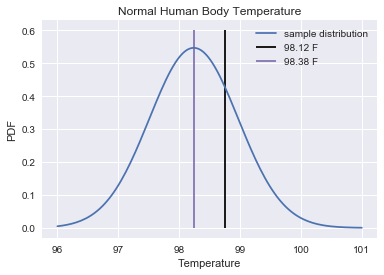

In [43]:
x = np.linspace(96,101,130)
y = stats.norm.pdf(x, loc=Sample_mean, scale=Sample_Std_Deviation)    
pylab.plot(x,y)

pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(upper_bound,0, 0.6)
pylab.vlines(lower_bound,0,0.6, color='C3')

pylab.legend(['sample distribution','98.12 F', '98.38 F'])
pylab.title('Normal Human Body Temperature')
    
pylab.show()

#### Lets also use Bootstrap Test to find the 95% confidence interval

In [30]:
ci_lower,ci_upper = bootci(x)

print('Lower',ci_lower)
print('Upper',ci_upper)

Lower 98.1253846154
Upper 98.3738461538


Given the lower bound of 98.12 and Upper bound of 98.37 , we can say that temperature 98.6 would be abnormal



#### As shown above we have proved with Frequentist as well as Bootstrap approach what is the Mean normal temperature with 95% confidence interval 

# 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.


We can derive the following null and alternate hypothesis for this problem



H0 : (there is no significant difference in the means of the two samples)
     Female mean temperature - Male mean temperature = 0

Ha : (There is significant difference in the means of the two samples- one tailed)
        
     Female mean temperature - Male mean temperature <= 0  





##### Lets first use the Frequentist approach

In [8]:
malesamples = df[df['gender'] == 'M']
maletemps = malesamples['temperature']

femalesamples = df[df['gender'] == 'F']
femaletemps = femalesamples['temperature']




In [59]:
tstats = stats.ttest_ind(maletemps,femaletemps)

In [60]:
print('tstats = ',tstats)

tstats =  Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


P_Value < 0.05 , Thus we reject the null hypothesis and accept the fact that "There is significant difference in the Male mean temperature and Female mean temperature

##### Lets first use the Bootstrap Test approach

In [9]:
maletempList = [a for a in maletemps]
femaletempsList = [a for a in femaletemps]



In [ ]:
'''
#Using boostrap for two sample test

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


empirical_diff_means = diff_of_means(maletempList, femaletempsList)

temp_concat = maletempList + femaletempsList

bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(temp_concat, size=len(temp_concat))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(maletempList)],
                                     bs_sample[len(femaletempsList):])


    
    # Compute and print p-value: p
p = np.sum(bs_replicates < empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

'''







In [19]:
p_val = bootpv(maletempList,femaletempsList)

p_val

Observed difference of two means: -0.29
130 out of 10000 experiments had a difference of two means less than or equal to -0.29
The chance of getting a difference of two means less than or equal to -0.29 is 0.0130


0.012999999999999999

P_Value < 0.05 , Thus we reject the null hypothesis and accept the fact that "There is significant difference in the Male mean temperature and Female mean temperature